<a href="https://colab.research.google.com/github/Sankhyesh/AI-Learning-Roadmap-2024/blob/main/20_eda_using_univariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import zipfile

# Ensure Kaggle directory exists
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)


In [2]:

# Move the Kaggle JSON file to the Kaggle directory
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Secure the Kaggle API token file

print("Kaggle API configured successfully.")

# Step 2: Define a function to download and extract datasets from Kaggle
def download_kaggle_dataset(dataset_name, download_path='/content'):
    """
    Downloads a dataset from Kaggle and extracts it to the specified directory.

    Args:
    - dataset_name (str): The Kaggle dataset identifier (e.g., 'markmedhat/titanic').
    - download_path (str): The directory where the dataset should be extracted.

    """
    # Download the dataset
    print(f"Downloading {dataset_name} dataset...")
    !kaggle datasets download -d {dataset_name} -p {download_path}

    # Extract the dataset if it's in zip format
    zip_path = os.path.join(download_path, f"{dataset_name.split('/')[-1]}.zip")
    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(download_path)
        print(f"Dataset {dataset_name} extracted successfully.")
        os.remove(zip_path)  # Clean up the zip file
    else:
        print("Download completed. No extraction needed.")

# Example usage
download_kaggle_dataset('markmedhat/titanic')
print("Data source import complete.")

# Step 3: List the files in the download directory
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Kaggle API configured successfully.
Dataset URL: https://www.kaggle.com/datasets/markmedhat/titanic
License(s): apache-2.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 32.1MB/s]
Dataset markmedhat/titanic extracted successfully.
Data source import complete.
/content/titanic.csv
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/default_configs.db
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/logs/2024.10.31/13.28.06.244995.log
/content/.config/logs/2024.10.31/13.27.44.468179.log
/content/.config/logs/2024.10.31/13.28.34.294687.log
/content/.config/logs/2024.10.31/13.28.20.142360.log
/content/.config/logs/2024.10.31

# Univariate Data Analysis in Machine Learning
## Understanding Exploratory Data Analysis (EDA)

### What Is EDA?

- **Definition**: EDA is the process of analyzing datasets to summarize their main characteristics, often using visual methods.
- **Purpose**: To understand the data better, detect patterns, anomalies, and test hypotheses.

### Types of EDA

1. **Univariate Analysis**: Examination of one variable at a time.
2. **Bivariate Analysis**: Examination of two variables simultaneously to understand the relationship between them.
3. **Multivariate Analysis**: Examination of more than two variables to understand complex interactions.



---

## Univariate Analysis

### What Does "Univariate" Mean?

- **Breakdown**:
  - **Uni**: Single.
  - **Variate**: Variable.
- **Definition**: Analysis of a single variable to understand its distribution and characteristics.

### Importance

- **Foundation**: Univariate analysis is the first step in EDA, providing a basic understanding of each variable.
- **Guidance**: Helps in choosing appropriate statistical methods and models for further analysis.

---

## Data Types in Univariate Analysis

### Numerical Data

- **Definition**: Variables that represent quantities and can be measured.
- **Examples**:
  - Height.
  - Weight.
  - Age.
  - Price of a product.
  - Battery capacity of a phone.

### Categorical Data

- **Definition**: Variables that represent categories or groups.
- **Examples**:
  - Country of residence.
  - Gender.
  - College or university attended.
  - Field of study.

### Identifying Data Types

- **Process**: For each column in your dataset, determine whether it is numerical or categorical.
- **Why It Matters**: The type of data influences the choice of visualization and statistical methods.



---

## Applying Univariate Analysis to the Titanic Dataset

### About the Dataset

- **Description**: Contains information about passengers on the Titanic, including whether they survived the shipwreck.
- **Objective**: Use univariate analysis to understand each variable in the dataset.

### Steps

1. **Import the Dataset**
   - Use pandas to read the CSV file into a DataFrame.
2. **Understand the Columns**
   - Identify which columns are numerical and which are categorical.
   - Examples:
     - `Survived`: Categorical (0 = No, 1 = Yes).
     - `Pclass`: Categorical (Passenger class).
     - `Age`: Numerical.
     - `Fare`: Numerical.
     - `Sex`: Categorical.

---


In [10]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("/content/titanic.csv")


## Analyzing Categorical Variables

### Techniques

1. **Frequency Count**
   - **Method**: Use `value_counts()` to count the occurrences of each category.
   - **Visualization**: Bar plots or pie charts.
   - **Example**:
     ```python
     df['Survived'].value_counts()
     ```
     - Shows how many passengers survived and how many did not.

2. **Bar Plots**
   - **Purpose**: Visualize the frequency of categories.
   - **Method**: Use seaborn's `countplot()` function.
   - **Example**:
     ```python
     sns.countplot(x='Pclass', data=df)
     ```
     - Visualizes the number of passengers in each class.

3. **Pie Charts**
   - **Purpose**: Show the proportion of categories as parts of a whole.
   - **Method**: Use matplotlib's `pie()` function.
   - **Example**:
     ```python
     df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
     ```
     - Displays the percentage of male and female passengers.

### Adding Analogies

- **Analogy for Frequency Counts**:
  - Counting the number of students in each class to understand class sizes.
- **Analogy for Bar Plots**:
  - Visualizing sales of different product categories in a store to see which sells the most.

---


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

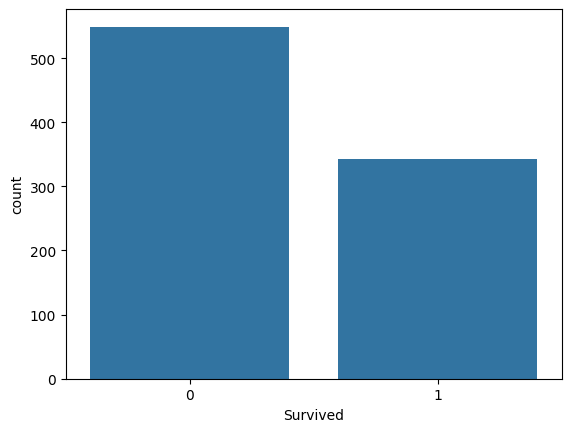

In [17]:
sns.countplot(x="Survived", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

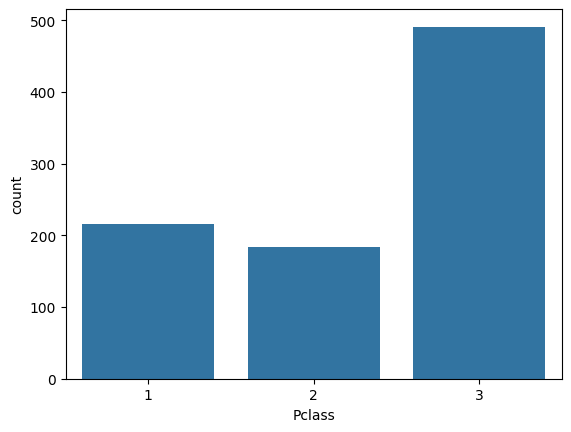

In [16]:
sns.countplot(x='Pclass', data=df)

<Axes: ylabel='count'>

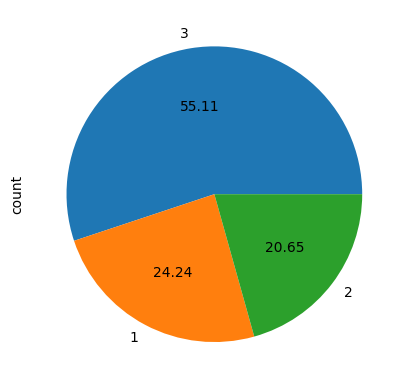

In [19]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')


## Analyzing Numerical Variables

### Techniques

1. **Histograms**
   - **Purpose**: Understand the distribution of numerical data.
   - **Method**: Use matplotlib or seaborn's `histplot()` function.
   - **Example**:
     ```python
     sns.histplot(df['Age'], bins=10)
     ```
     - Shows the age distribution of passengers.
   - **Interpretation**:
     - See which age groups had more passengers.
   - **Analogy**:
     - Like creating bins for heights of students to see how many fall into each height range.


(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

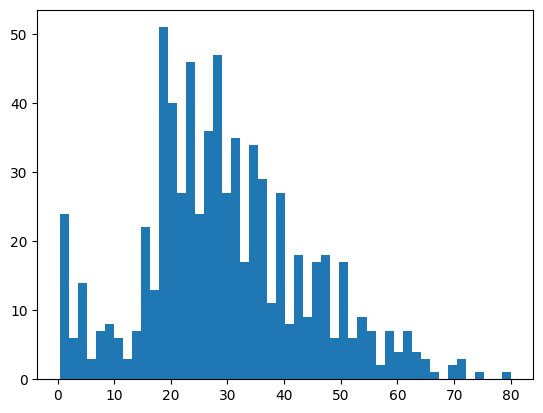

In [21]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins = 50)


2. **Density Plots**
   - **Purpose**: Show the probability density of the variable.
   - **Method**: Use seaborn's `kdeplot()`.
   - **Example**:
     ```python
     sns.kdeplot(df['Fare'])
     ```
     - Visualizes the distribution of fares paid.
   - **Analogy**:
     - Similar to smoothing out a histogram to see the overall trend.


<ipython-input-22-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

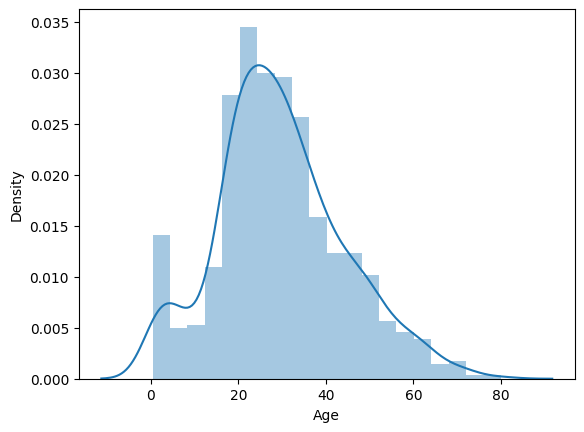

In [22]:
sns.distplot(df['Age'])


3. **Box Plots**
   - **Purpose**: Summarize data using quartiles and identify outliers.
   - **Method**: Use seaborn's `boxplot()`.
   - **Example**:
     ```python
     sns.boxplot(y='Age', data=df)
     ```
     - Shows median, quartiles, and potential outliers in age.
   - **Interpretation**:
     - **Median**: The middle value.
     - **Quartiles**: Divides data into four equal parts.
     - **Outliers**: Data points that fall outside the typical range.
   - **Analogy**:
     - Like a summary of test scores showing the middle score, spread, and any unusually high or low scores.


IQR- interquartile range

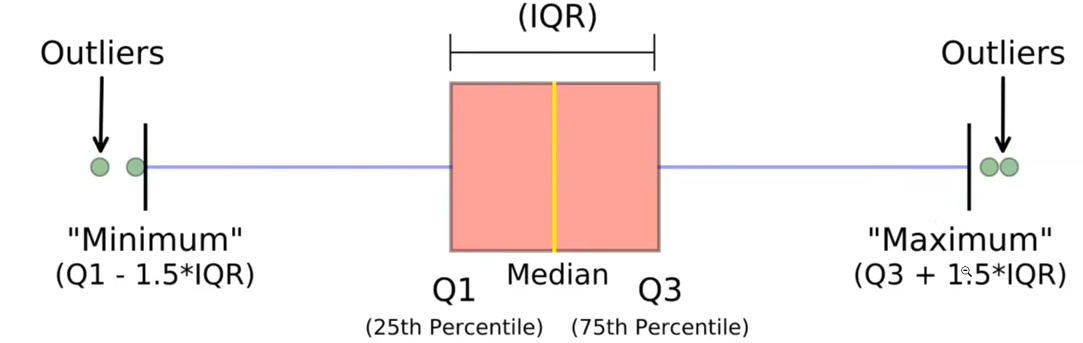

<Axes: ylabel='Age'>

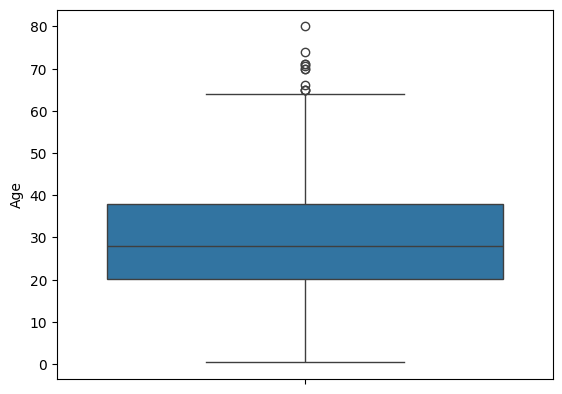

In [24]:
sns.boxplot(df['Age'])


4. **Statistical Measures**
   - **Mean**: Average value.
   - **Median**: Middle value when data is sorted.
   - **Mode**: Most frequent value.
   - **Standard Deviation**: Measures the spread of data.
   - **Example**:
     ```python
     df['Age'].mean()
     df['Age'].median()
     df['Age'].std()
     ```
   - **Analogy**:
     - Understanding the average and variability of students' test scores in a class.

---


In [26]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000



## Understanding Data Distribution

### Skewness

- **Definition**: Measures the asymmetry of the distribution.
- **Types**:
  - **Positive Skew (Right-Skewed)**: Tail on the right side.
  - **Negative Skew (Left-Skewed)**: Tail on the left side.
- **Method**:
  ```python
  df['Fare'].skew()
  ```
- **Interpretation**:
  - A high positive skew indicates a long tail on the right.
- **Analogy**:
  - Income distribution in a population where most people earn less, and a few earn significantly more.


In [27]:
df['Age'].skew()

0.38910778230082704


### Kurtosis

- **Definition**: Measures the "tailedness" of the distribution.
- **Method**:
  ```python
  df['Fare'].kurtosis()
  ```
- **Interpretation**:
  - High kurtosis indicates heavy tails and outliers.
- **Analogy**:
  - Examining the sharpness of a mountain peak to understand the concentration of values.

---

## Practical Tips

- **Handling Missing Values**:
  - Use `df.isnull().sum()` to identify missing data.
  - Decide whether to fill or drop missing values.
- **Choosing the Right Plot**:
  - **Categorical Data**: Use bar plots or pie charts.
  - **Numerical Data**: Use histograms, density plots, or box plots.
- **Interpreting Plots**:
  - Look for patterns, anomalies, and outliers.
  - Use plots to generate hypotheses about the data.

---

## Conclusion

- **Recap**:
  - Univariate analysis involves examining each variable individually.
  - Different techniques are used based on whether data is numerical or categorical.
- **Key Takeaways**:
  - **Categorical Variables**: Frequency counts and bar plots help understand the distribution.
  - **Numerical Variables**: Histograms and box plots reveal the data's spread and identify outliers.
- **Analogy for Univariate Analysis**:
  - Like getting to know each character in a story individually before understanding their interactions.

---
